In [2]:
import sys
sys.path

['d:\\PROJECT\\Computer Vision\\cv_tutorial\\OpenCV Load, Display & Save (Image & Video)',
 'c:\\Users\\derry\\anaconda3\\envs\\CV\\python311.zip',
 'c:\\Users\\derry\\anaconda3\\envs\\CV\\DLLs',
 'c:\\Users\\derry\\anaconda3\\envs\\CV\\Lib',
 'c:\\Users\\derry\\anaconda3\\envs\\CV',
 '',
 'C:\\Users\\derry\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'c:\\Users\\derry\\anaconda3\\envs\\CV\\Lib\\site-packages',
 'c:\\Users\\derry\\anaconda3\\envs\\CV\\Lib\\site-packages\\win32',
 'c:\\Users\\derry\\anaconda3\\envs\\CV\\Lib\\site-packages\\win32\\lib',
 'c:\\Users\\derry\\anaconda3\\envs\\CV\\Lib\\site-packages\\Pythonwin',
 'c:\\Users\\derry\\anaconda3\\envs\\CV\\Lib\\site-packages\\setuptools\\_vendor']

In [3]:
import cv2

# Cheking version of cv2

In [4]:
print(cv2.__version__)
print(cv2.__file__)

4.10.0
c:\Users\derry\anaconda3\envs\CV\Lib\site-packages\cv2.cp311-win_amd64.pyd


# Read Image & Image Matrix

In [5]:
img = cv2.imread('kim-sejeong.jpg')
type(img)

numpy.ndarray

In [6]:
img.shape

(647, 431, 3)

In [7]:
# unpack the tuple
h,w,c = img.shape

In [8]:
# total pixel per layer
h*w

278857

In [9]:
# total bytes 
print(f"In Bytes\t= ", img.nbytes, "Bytes")

print(f"In kilo Bytes\t= " ,(img.nbytes)/1024, "kB")

In Bytes	=  836571 Bytes
In kilo Bytes	=  816.9638671875 kB


In [10]:
print(img.ndim)
print(img.min())
print(img.max())
print()
print(img.size) # calc otomatis
print(h*w*c) # calc manually

3
0
202

836571
836571


# Access Image Channel & Individual Pixel

In [11]:
img[:,:,0].shape # layer B (Blue)

(647, 431)

In [12]:
img[:,:,1].shape # layer G (Green)

(647, 431)

In [13]:
img[:,:,2].shape # layer R (Red)

(647, 431)

In [14]:
img[0,0] 

# hasil output akan me-return BGR pada gambar di pixel x=0 y=0

array([55, 58, 63], dtype=uint8)

In [15]:
#unpack

B,G,R = img[100,100]

print("R=%d | G=%d | B=%d " % (R,G,B))

R=83 | G=79 | B=76 


# Display Image

In [16]:
cv2.imshow('kim-sejeong.jpg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

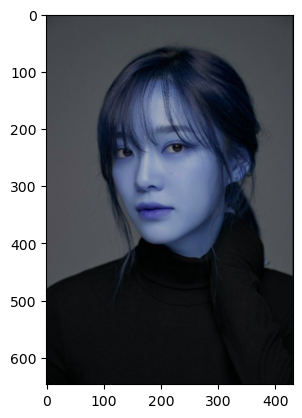

In [17]:
import matplotlib.pyplot as plt

plt.imshow(img)



gambar akan kebiruan dikarenakan img menfasirkan channel nya sebagai BGR dan bukan RGB yang biasa kita gunakan. Maka dari itu harus kita fix dengan reverse dahulu channel matrix nya

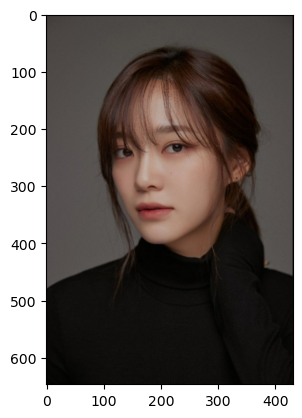

In [18]:
img_rgb = img[:,:,::-1]
plt.imshow(img_rgb)

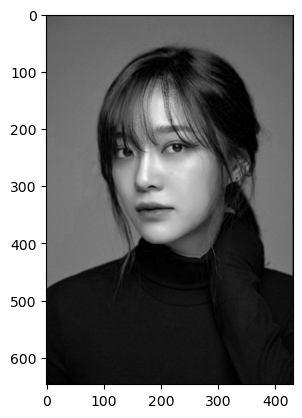

In [19]:
img_red = img[:,:,0]
plt.imshow(img_red, cmap='grey')

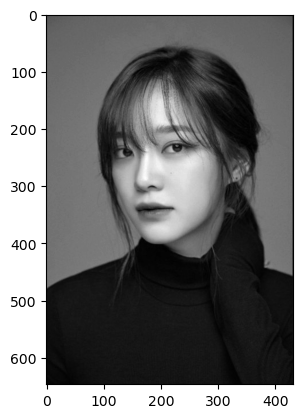

In [20]:
img_green = img[:,:,1]
plt.imshow(img_green, cmap='grey')

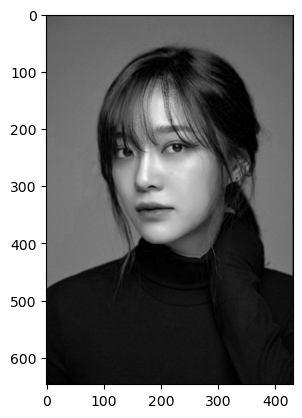

In [21]:
img_blue = img[:,:,2]
plt.imshow(img_red, cmap='grey')

Simpulannya adalah 3 gambar diatas merupakan bagian per layer nya yang dipisahkan dah di show dengan plt.imshow yang kemudian saya buat cmap nya grey, gabungan dari ketiga gambar ini adalah gambar utuh selayak gambar asli nya.

Bila di compare, channel red memiliki intensitas lebih tajam sedangkan channel blue memiliki intensitas yang tidak setajam red dan green

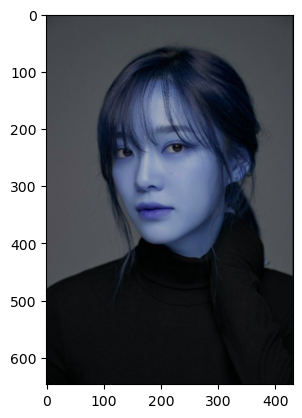

In [22]:
plt.imshow(img)

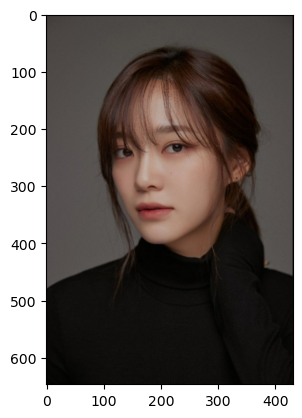

In [23]:
img_cvtC = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvtC)

cara lain daripada reverse manually dengan ::-1 adalah dengan cvtColor dan masukan paramater COLOR_BGR2RGB

# Video

In [43]:
vid = cv2.VideoCapture('test.mp4')

while vid.isOpened():
    ret, frame = vid.read()
    if ret:
        cv2.imshow('Frame', frame)
        if cv2.waitKey(10) == ord('q'):
            break
        if cv2.waitKey(10) == ord('s'):
            cv2.imwrite("vid captured.jpg", frame)
            print("image captured")
    else:
        break
vid.release()
cv2.destroyAllWindows()

image captured


In [44]:
photo = cv2.VideoCapture(0)

ret,frame = photo.read()

if ret:
    cv2.imwrite("live-photo.jpg", frame)
else:
    print("Cannot save photo")

photo.release()

In [47]:
vids = cv2.VideoCapture(1)

# vids.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
# vids.set(cv2.CAP_PROP_FRAME_WIDTH, 240)

fourcc = cv2.VideoWriter_fourcc(*'MP4V')

out = cv2.VideoWriter('video.mp4', fourcc, 20, (320,240))

cv2.VideoWriter
while(vids.isOpened()):
    ret, frame = vids.read()
    if ret:
        out.write(frame)
        cv2.imshow('frame', frame)
        key = cv2.waitKey(1)
        if key == ord('q'):
            break
        if key == ord('s'):
            cv2.imwrite('vids-captured.jpg', frame)
            print("captured succeed")
    else:
        break

vids.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
vids.release()
out.release()
cv2.destroyAllWindows()